# LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,f1_score,confusion_matrix,plot_confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df2=pd.read_csv('Holiday_Package.csv')

In [1542]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [1543]:
df2=df2.iloc[:,1:]

In [1544]:
dict={'Holliday_Package':'holiday_package','Salary':'salary'}
df2.rename(columns=dict, inplace=True)

In [1545]:
df2.head()

,holiday_package,salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [1546]:
df2.shape

(872, 7)

In [1547]:
df2.isnull().sum()

holiday_package      0
salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [1548]:
df2.duplicated().sum()

0

In [1549]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   holiday_package    872 non-null    object
 1   salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [1550]:
for i in df2.select_dtypes('object'):
    print('\n',df2.value_counts(i))


 holiday_package
no     471
yes    401
dtype: int64

 foreign
no     656
yes    216
dtype: int64


In [1551]:
df2[df2['educ']<3]

,holiday_package,salary,age,educ,no_young_children,no_older_children,foreign
218,no,31844,24,2,0,0,no
710,no,44595,39,2,1,0,yes
750,yes,37458,41,2,0,2,yes
762,yes,12578,29,1,2,0,yes
779,yes,40552,43,2,0,2,yes
832,no,35726,44,2,0,1,yes
851,yes,35730,33,2,1,3,yes


In [1552]:
df2.describe(include='all')

,holiday_package,salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


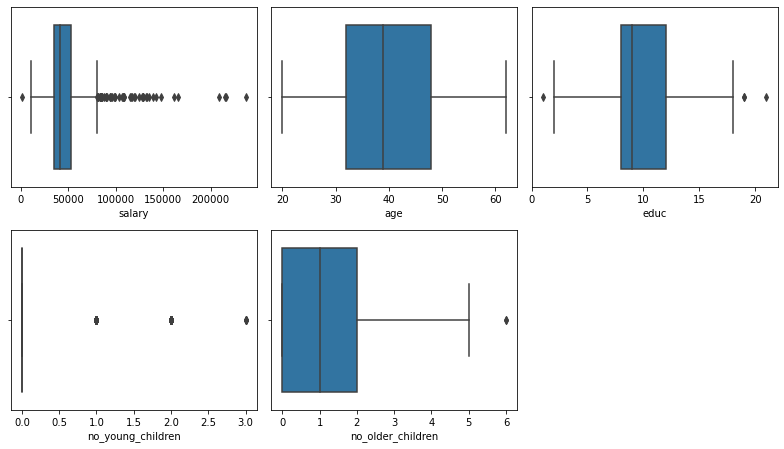

In [1553]:
plot = df2.select_dtypes('int64')
fig=plt.figure(figsize=(11,9))
for i in range(len(plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(x= plot[plot.columns[i]])
plt.tight_layout()
plt.show()

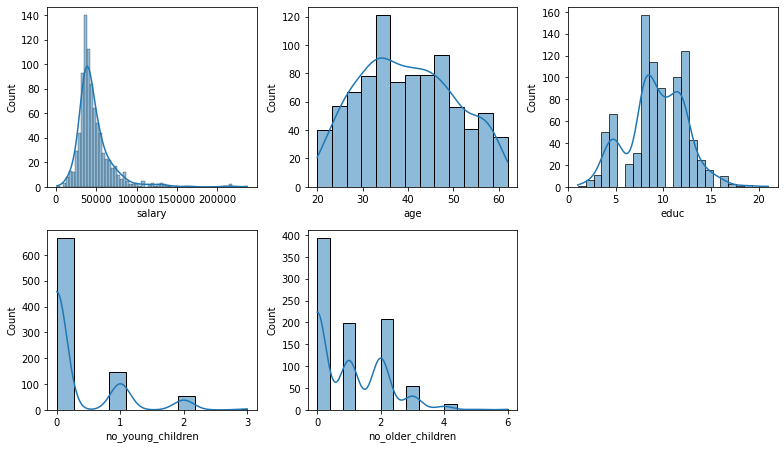

In [1554]:
plot = df2.select_dtypes('int64')
fig=plt.figure(figsize=(11,9))
for i in range(len(plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.histplot(x= plot[plot.columns[i]], kde=True)
plt.tight_layout()
plt.show()

<AxesSubplot:>

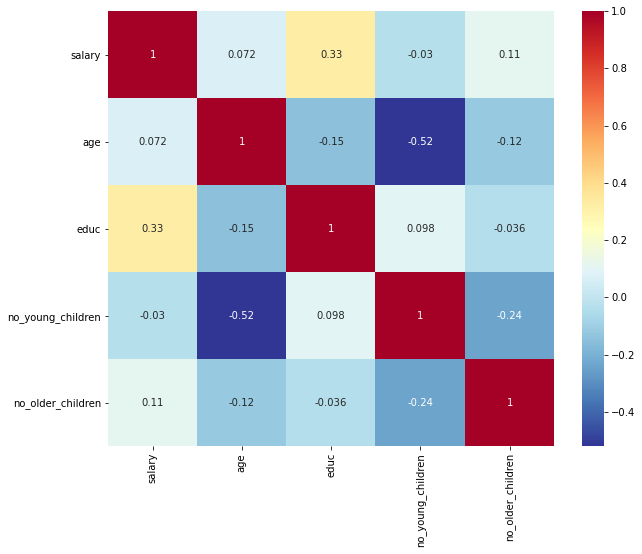

In [1555]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True, cmap='RdYlBu_r')

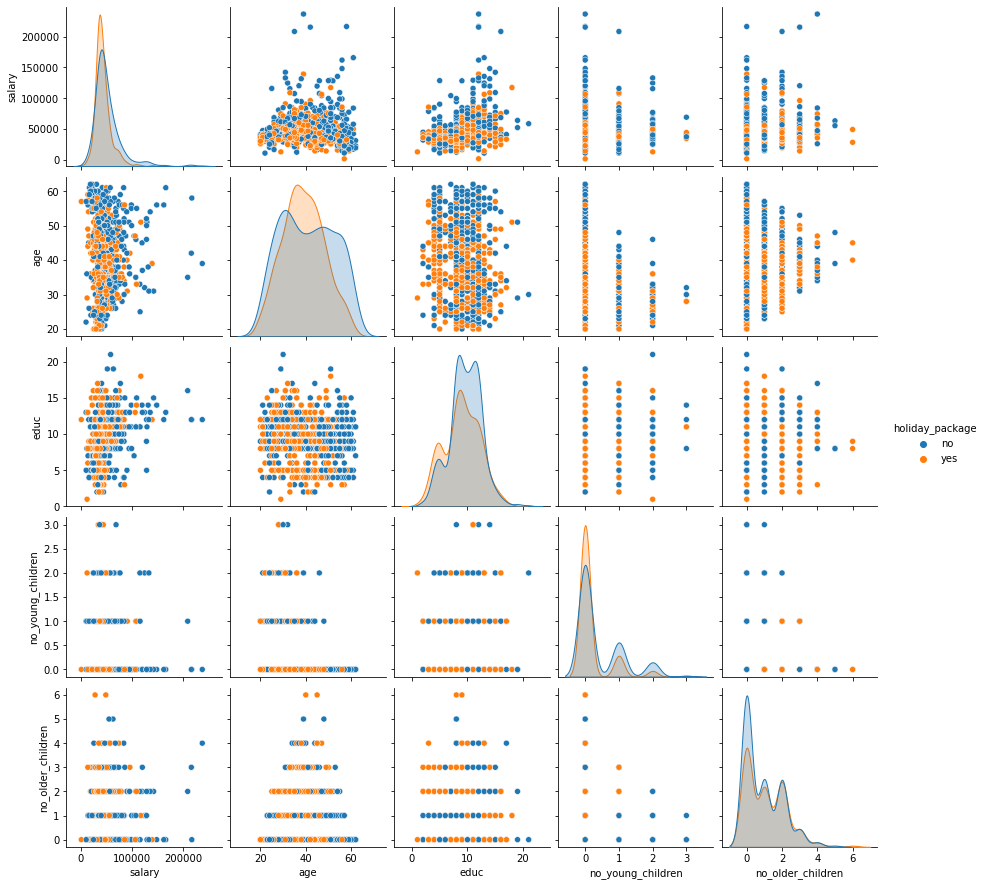

In [1538]:
sns.pairplot(data=df2, hue='holiday_package', diag_kind='kde')

In [1556]:
df2['pay_grade']=pd.cut(df2['salary'],bins=[1300,10000,30000,40000,50000,60000,70000,250000],
                          labels=['1.3k to 10k','10k to 30k','30k to 40k','40k to 50k','50k to 60k','60k to 70k','Above 70k'])

In [1557]:
df2['age_range']=pd.cut(df2['age'],bins=[20,30,40,50,60,70],
                          labels=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70'])

In [1558]:
df2['age_range'].value_counts()

30 to 40    283
40 to 50    243
20 to 30    175
50 to 60    152
60 to 70     11
Name: age_range, dtype: int64

In [1559]:
df2['pay_grade'].value_counts()

30k to 40k     280
40k to 50k     230
50k to 60k     115
Above 70k       93
10k to 30k      93
60k to 70k      60
1.3k to 10k      1
Name: pay_grade, dtype: int64

<AxesSubplot:xlabel='pay_grade', ylabel='count'>

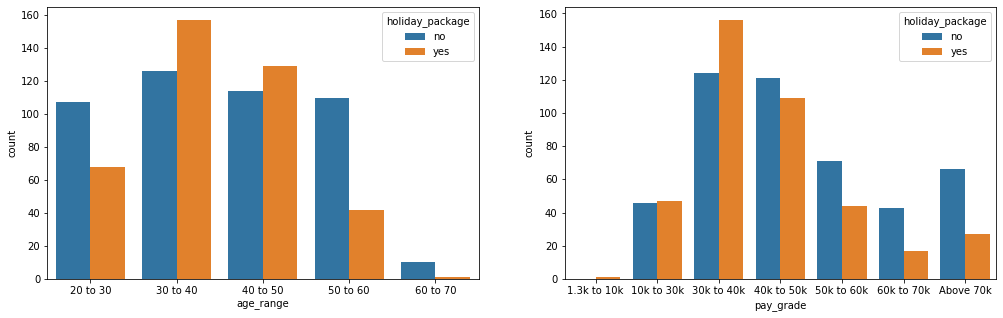

In [1560]:
fig, axs = plt.subplots(1,2,figsize=(17,5))
sns.countplot(x='age_range',hue='holiday_package',data=df2, ax=axs[0])
sns.countplot(x='pay_grade',hue='holiday_package',data=df2, ax=axs[1])

In [1561]:
df2[(df2['no_young_children']==0)&(df2['no_older_children']==0)].holiday_package.value_counts()

no     138
yes    133
Name: holiday_package, dtype: int64

In [1562]:
df2['total_children']=df2['no_young_children']+df2['no_older_children']

In [1563]:
pd.crosstab(df2['holiday_package'],[df2['no_young_children'],df2['no_older_children'], df2['total_children']],
            margins=True, margins_name= 'Total')

no_young_children    0                           1              2        3     \
no_older_children    0    1    2   3   4  5  6   0   1   2  3   0  1  2  0  1   
total_children       0    1    2   3   4  5  6   1   2   3  4   2  3  4  3  4   
holiday_package                                                                 
no                 138   68   88  23   7  2  0  55  29  12  4  36  4  2  2  1   
yes                133   71   99  27   7  0  2  17  22   7  1  10  3  0  2  0   
Total              271  139  187  50  14  2  2  72  51  19  5  46  7  2  4  1   

no_young_children Total  
no_older_children        
total_children           
holiday_package          
no                  471  
yes                 401  
Total               872

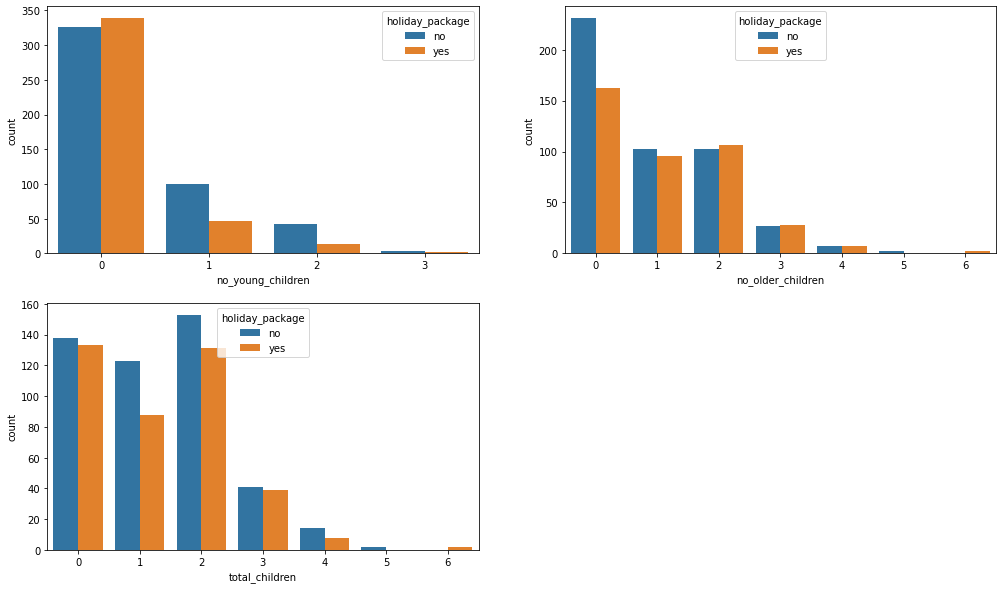

In [1564]:
fig, axs = plt.subplots(2,2,figsize=(17,10))
sns.countplot(x='no_young_children',hue='holiday_package',data=df2, ax=axs[0,0])
sns.countplot(x='no_older_children',hue='holiday_package',data=df2, ax=axs[0,1])
sns.countplot(x='total_children',hue='holiday_package',data=df2, ax=axs[1,0])
fig.delaxes(axs[1,1])

<AxesSubplot:xlabel='foreign', ylabel='count'>

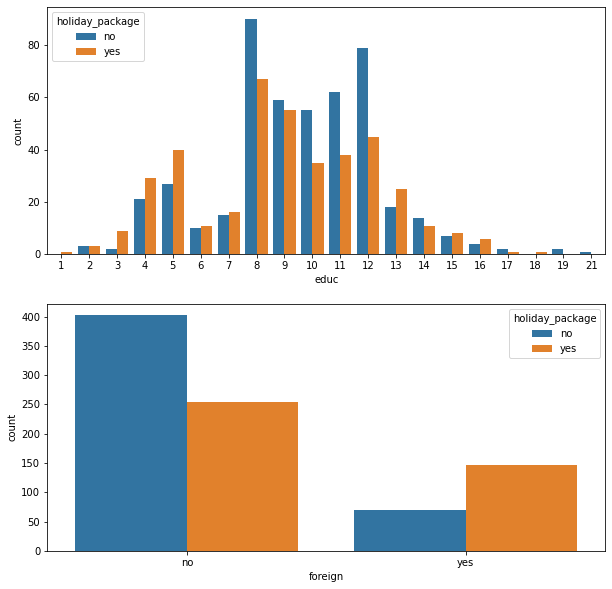

In [1565]:
fig, axs = plt.subplots(2,figsize=(10,10))
sns.countplot(x='educ',hue='holiday_package',data=df2, ax=axs[0])
sns.countplot(x='foreign',hue='holiday_package',data=df2, ax=axs[1])

In [1566]:
pd.crosstab(df2['holiday_package'],[df2.foreign,df2['no_young_children'], df2['no_older_children']],
            margins=True, margins_name= 'Total').T

holiday_package                               no  yes  Total
foreign no_young_children no_older_children                 
no      0                 0                  128   95    223
                          1                   52   41     93
                          2                   78   63    141
                          3                   21   18     39
                          4                    7    6     13
                          5                    2    0      2
                          6                    0    2      2
        1                 0                   48   10     58
                          1                   20   11     31
                          2                    8    2     10
                          3                    4    0      4
        2                 0                   28    6     34
                          1                    2    0      2
                          2                    2    0      2
        3                 0                    1    0      1
                          1                    1    0      1
yes     0                 0                   10   38     48
                          1                   16   30     46
                          2                   10   36     46
                          3                    2    9     11
                          4                    0    1      1
        1                 0                    7    7     14
                          1                    9   11     20
                          2                    4    5      9
                          3                    0    1      1
        2                 0                    8    4     12
                          1                    2    3      5
        3                 0                    1    2      3
Total                                        471  401    872

In [1567]:
pd.crosstab(df2['holiday_package'],df2.foreign, margins=True,margins_name="Total").T

holiday_package,no,yes,Total
foreign,,,
no,402,254,656
yes,69,147,216
Total,471,401,872


In [1568]:
df2.drop(['pay_grade','age_range','total_children'],axis=1, inplace=True)

In [1569]:
Q1=df2.quantile(0.25)
Q3=df2.quantile(0.75)

IQR=Q3-Q1
low=Q1-(1.5* IQR)
up=Q3+(1.5* IQR)

In [1570]:
low

salary               8105.75
age                     8.00
educ                    2.00
no_young_children       0.00
no_older_children      -3.00
dtype: float64

In [1571]:
up

salary               80687.75
age                     72.00
educ                    18.00
no_young_children        0.00
no_older_children        5.00
dtype: float64

In [1572]:
# def rem_outliers(cols):
#     x = []
#     q1 = df2[cols].quantile(.10)
#     q3 = df2[cols].quantile(.90)
#     IQR = q3-q1
#     up = float(q3+(1.5*IQR))
#     low = float(q1-(1.5*IQR))

#     for i in df2[cols]:
#         if i > up:
#             i = up
#         elif i < low:
#             i = low
#         else:
#             i=i
#         x.append(i)
#     return x

# for attr in df2[['salary','educ','no_older_children']]:
#     df2[attr]=rem_outliers(attr)

In [1573]:
# plot = df2.select_dtypes(['int64','float64'])
# fig=plt.figure(figsize=(15,9))
# for i in range(len(plot.columns)):
#     ax=fig.add_subplot(3,3,i+1)
#     sns.boxplot(x= plot[plot.columns[i]])
# plt.tight_layout()
# plt.show()

In [1574]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [1575]:
df2.holiday_package=LE.fit_transform(df2.holiday_package)

In [1576]:
df2.foreign=pd.get_dummies(df2.foreign)

In [1577]:
print('\n','1 for Yes and 0 for No','\n','\n',df2.holiday_package.value_counts(),'\n')
print('1 for Yes and 0 for No','\n','\n',df2.foreign.value_counts())


 1 for Yes and 0 for No 
 
 0    471
1    401
Name: holiday_package, dtype: int64 

1 for Yes and 0 for No 
 
 1    656
0    216
Name: foreign, dtype: int64


In [1578]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   holiday_package    872 non-null    int64
 1   salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    uint8
dtypes: int64(6), uint8(1)
memory usage: 41.9 KB


In [1580]:
# array = df2.values

# X = array[:,1:6] 
# Y = array[:,0]

In [1581]:
df2.head()

,holiday_package,salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,1
1,1,37207,45,8,0,1,1
2,0,58022,46,9,0,0,1
3,0,66503,31,11,2,0,1
4,0,66734,44,12,0,2,1


In [1582]:
X = df2.drop('holiday_package',axis=1)
Y = df2.pop('holiday_package')

In [1583]:
X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [1584]:
print('No of Training Independent Variables',X_train.shape)
print('No of Testing Independent Variables',X_test.shape)
print('No of Training Dependent Variables',train_labels.shape)
print('No of Testing Dependent Variables',test_labels.shape)

No of Training Independent Variables (610, 6)
No of Testing Independent Variables (262, 6)
No of Training Dependent Variables (610,)
No of Testing Dependent Variables (262,)


In [1585]:
lg = LogisticRegression()
lg.fit(X_train, train_labels)

LogisticRegression()

In [1586]:
lg.intercept_

array([0.00031107])

In [1587]:
predict_tr=lg.predict(X_train)

In [1588]:
print('LOGIT TRAINING','\n')
print('Accuracy','\n',lg.score(X_train,train_labels))
print()
print('confusion_matrix','\n',confusion_matrix(train_labels, predict_tr))
print()
print('classification_report','\n',classification_report(train_labels, predict_tr))

LOGIT TRAINING 

Accuracy 
 0.521311475409836

confusion_matrix 
 [[295  31]
 [261  23]]

classification_report 
               precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.43      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



In [1589]:
predict_te=lg.predict(X_test)

In [1590]:
print('LOGIT TESTING','\n')
print('Accuracy','\n',lg.score(X_test,test_labels))
print()
print('confusion_matrix','\n',confusion_matrix(test_labels, predict_te))
print()
print('classification_report','\n',classification_report(test_labels, predict_te))

LOGIT TESTING 

Accuracy 
 0.5419847328244275

confusion_matrix 
 [[132  13]
 [107  10]]

classification_report 
               precision    recall  f1-score   support

           0       0.55      0.91      0.69       145
           1       0.43      0.09      0.14       117

    accuracy                           0.54       262
   macro avg       0.49      0.50      0.42       262
weighted avg       0.50      0.54      0.44       262



## FINE TUNING 

In [11]:
grid_lg={'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
         'penalty':['l2','none','l1'],
         'tol':[0.001,0.0001]}

In [13]:
model_lg = LogisticRegression(max_iter=100000,n_jobs=2,random_state=2)

In [14]:
grid_search_lg = GridSearchCV(estimator = model_lg, param_grid = grid_lg, cv = 10,n_jobs=-1,scoring='f1')

In [1594]:
grid_search_lg.fit(X_train, train_labels)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, n_jobs=2,
                                          random_state=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.001, 0.0001]},
             scoring='f1')

In [1595]:
print(grid_search_lg.best_params_,'\n')
print(grid_search_lg.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', random_state=2,
                   solver='liblinear')


In [1596]:
best_model_lg = grid_search_lg.best_estimator_

### CHANGING THRESHOLD LEVELS

In [1597]:
from sklearn.preprocessing import binarize
for i in range(3,8):
    
    pred_prob_yes=best_model_lg.predict_proba(X_train)
    pred_tr=binarize(pred_prob_yes,i/10)[:,1]
    
    cm  = accuracy_score(train_labels,pred_tr).round(4)
    cm1 = classification_report(train_labels,pred_tr)
    cm2 = confusion_matrix(train_labels,pred_tr)
    
    print('CUTOFF',i/10,'\n')
    print ('Accuracy score ',cm,'\n')
    print ('Classification Report','\n','\n',cm1,'\n')
    print ('Confusion Matrix ','\n','\n',cm2,'\n')

CUTOFF 0.3 

Accuracy score  0.5934 

Classification Report 
 
               precision    recall  f1-score   support

           0       0.81      0.31      0.45       326
           1       0.54      0.92      0.68       284

    accuracy                           0.59       610
   macro avg       0.68      0.61      0.56       610
weighted avg       0.69      0.59      0.56       610
 

Confusion Matrix  
 
 [[101 225]
 [ 23 261]] 

CUTOFF 0.4 

Accuracy score  0.659 

Classification Report 
 
               precision    recall  f1-score   support

           0       0.73      0.58      0.65       326
           1       0.61      0.75      0.67       284

    accuracy                           0.66       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.66      0.66       610
 

Confusion Matrix  
 
 [[189 137]
 [ 71 213]] 

CUTOFF 0.5 

Accuracy score  0.6836 

Classification Report 
 
               precision    recall  f1-score   support

  

### CUTOFF 0.4 IS BEST

In [1598]:
pred_final_tr = (best_model_lg.predict_proba(X_train)[:,1]>=0.4).astype(int)
pred_final_te = (best_model_lg.predict_proba(X_test)[:,1]>=0.4).astype(int)

In [1599]:
lg_tr=classification_report(train_labels, pred_final_tr,output_dict=True)
dfa1_tr=pd.DataFrame(lg_tr).transpose()
lg_tr_precision=round(dfa1_tr.loc["1"][0],2)
lg_tr_recall=round(dfa1_tr.loc["1"][1],2)
lg_tr_f1=round(dfa1_tr.loc["1"][2],2)

LOGIT TRAINING

Accuracy score 0.659 


classification_report 
 
               precision    recall  f1-score   support

           0       0.73      0.58      0.65       326
           1       0.61      0.75      0.67       284

    accuracy                           0.66       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.66      0.66       610


confusion_matrix 
 
 [[189 137]
 [ 71 213]] 


ROC-AUC SCORE 0.6649 



Text(0.5, 1.0, 'ROC')

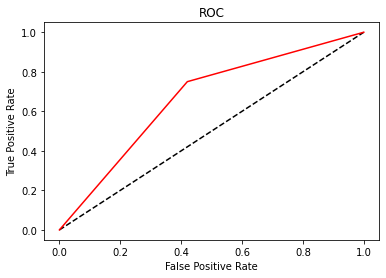

In [1600]:
lg_tr_acc=accuracy_score(train_labels,pred_final_tr).round(4)
lg_tr_auc=roc_auc_score(train_labels,pred_final_tr).round(4)

print('LOGIT TRAINING')
print()
print('Accuracy score',lg_tr_acc,'\n')
print()
print('classification_report','\n','\n',classification_report(train_labels,pred_final_tr))
print()
print('confusion_matrix','\n','\n',confusion_matrix(train_labels,pred_final_tr),'\n')
print()
print('ROC-AUC SCORE', lg_tr_auc,'\n')

lg_train_fpr, lg_train_tpr, lg_train_thresholds = roc_curve(train_labels, pred_final_tr)
plt.plot([0, 1], [0, 1],color='black',linestyle='--')
plt.plot(lg_train_fpr, lg_train_tpr,color='red');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')




In [1601]:
lg_te=classification_report(test_labels, pred_final_te,output_dict=True)
dfa1_te=pd.DataFrame(lg_te).transpose()
lg_te_precision=round(dfa1_te.loc["1"][0],2)
lg_te_recall=round(dfa1_te.loc["1"][1],2)
lg_te_f1=round(dfa1_te.loc["1"][2],2)


LOGIT TESTING

Accuracy score  0.6679 


classification_report 
 
               precision    recall  f1-score   support

           0       0.77      0.57      0.66       145
           1       0.60      0.79      0.68       117

    accuracy                           0.67       262
   macro avg       0.68      0.68      0.67       262
weighted avg       0.69      0.67      0.67       262


confusion_matrix 
 
 [[83 62]
 [25 92]]

ROC-AUC SCORE 0.6794 



Text(0.5, 1.0, 'ROC')

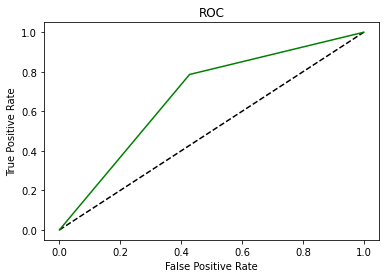

In [1602]:
lg_te_acc=accuracy_score(test_labels,pred_final_te).round(4)
lg_te_auc=roc_auc_score(test_labels,pred_final_te).round(4)


print()
print('LOGIT TESTING')
print()
print('Accuracy score ',lg_te_acc,'\n')
print()
print('classification_report','\n','\n',classification_report(test_labels,pred_final_te))
print()
print('confusion_matrix','\n','\n',confusion_matrix(test_labels,pred_final_te))
print()
print('ROC-AUC SCORE', lg_te_auc,'\n')

lg_test_fpr, lg_test_tpr, lg_test_thresholds = roc_curve(test_labels,pred_final_te)
plt.plot([0, 1], [0, 1], color='black',linestyle='--')
plt.plot(lg_test_fpr, lg_test_tpr,color='green');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')



# LINEAR DISCRIMINANT ANALYIS

In [1603]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1604]:
lda= LinearDiscriminantAnalysis()
lda=lda.fit(X_train,train_labels)

In [1605]:
predict_tr = lda.predict(X_train)
predict_te = lda.predict(X_test)

In [1606]:
print('LDA TRAINING','\n')
print('Accuracy','\n',lda.score(X_train,train_labels))
print()
print('confusion_matrix','\n',confusion_matrix(train_labels, predict_tr))
print()
print('classification_report','\n',classification_report(train_labels, predict_tr))

LDA TRAINING 

Accuracy 
 0.6721311475409836

confusion_matrix 
 [[252  74]
 [126 158]]

classification_report 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [1607]:
print('LDA TESTING','\n')
print('Accuracy','\n',lda.score(X_test,test_labels))
print()
print('confusion_matrix','\n',confusion_matrix(test_labels, predict_te))
print()
print('classification_report','\n',classification_report(test_labels, predict_te))

LDA TESTING 

Accuracy 
 0.6412213740458015

confusion_matrix 
 [[103  42]
 [ 52  65]]

classification_report 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [1608]:
print(classification_report(train_labels,predict_tr))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



## FINE TUNING

In [1609]:
grid_lda={'shrinkage':['none','auto','float'],
      'solver':['svd','lsqr','eigen'],
      'tol':[0.01,0.001,0.0001]}

In [1610]:
model_lda = LinearDiscriminantAnalysis()

In [1611]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = 10)

In [1612]:
grid_search_lda.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['none', 'auto', 'float'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.01, 0.001, 0.0001]})

In [1613]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.01} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.01)


In [1614]:
best_model_lda = grid_search_lda.best_estimator_

In [1615]:
predict_tr = best_model_lda.predict(X_train)
predict_te = best_model_lda.predict(X_test)

In [1616]:
print(classification_report(train_labels,predict_tr))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       326
           1       0.68      0.54      0.60       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [1617]:
from sklearn.preprocessing import binarize
for i in range(3,8):
    
    pred_prob_yes=best_model_lda.predict_proba(X_train)
    pred_tr=binarize(pred_prob_yes,i/10)[:,1]
    
    cm  = accuracy_score(train_labels,pred_tr).round(4)
    cm1 = classification_report(train_labels,pred_tr)
    cm2 = confusion_matrix(train_labels,pred_tr)
    
    print('CUTOFF',i/10,'\n')
    print ('Accuracy score ',cm,'\n')
    print ('Classification Report','\n','\n',cm1,'\n')
    print ('Confusion Matrix ','\n','\n',cm2,'\n')

CUTOFF 0.3 

Accuracy score  0.5885 

Classification Report 
 
               precision    recall  f1-score   support

           0       0.82      0.30      0.44       326
           1       0.53      0.92      0.68       284

    accuracy                           0.59       610
   macro avg       0.67      0.61      0.56       610
weighted avg       0.68      0.59      0.55       610
 

Confusion Matrix  
 
 [[ 97 229]
 [ 22 262]] 

CUTOFF 0.4 

Accuracy score  0.6639 

Classification Report 
 
               precision    recall  f1-score   support

           0       0.73      0.59      0.65       326
           1       0.61      0.75      0.68       284

    accuracy                           0.66       610
   macro avg       0.67      0.67      0.66       610
weighted avg       0.68      0.66      0.66       610
 

Confusion Matrix  
 
 [[192 134]
 [ 71 213]] 

CUTOFF 0.5 

Accuracy score  0.6672 

Classification Report 
 
               precision    recall  f1-score   support

 

### CUTOFF 0.4 IS BEST

In [1618]:
pred_final_tr = (best_model_lda.predict_proba(X_train)[:,1]>=0.4).astype(int)
pred_final_te = (best_model_lda.predict_proba(X_test)[:,1]>=0.4).astype(int)

In [1619]:
lda_tr=classification_report(train_labels, pred_final_tr,output_dict=True)
dfa2_tr=pd.DataFrame(lda_tr).transpose()
lda_tr_precision=round(dfa2_tr.loc["1"][0],2)
lda_tr_recall=round(dfa2_tr.loc["1"][1],2)
lda_tr_f1=round(dfa2_tr.loc["1"][2],2)

TRAINING

Accuracy score 0.6639 


classification_report 
 
               precision    recall  f1-score   support

           0       0.73      0.59      0.65       326
           1       0.61      0.75      0.68       284

    accuracy                           0.66       610
   macro avg       0.67      0.67      0.66       610
weighted avg       0.68      0.66      0.66       610


confusion_matrix 
 
 [[192 134]
 [ 71 213]] 


ROC-AUC SCORE 0.6695 



Text(0.5, 1.0, 'ROC')

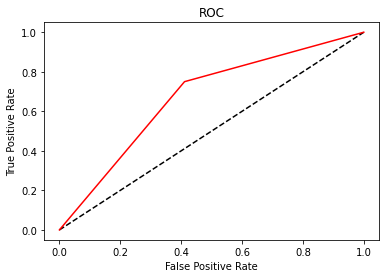

In [1620]:
lda_tr_acc=accuracy_score(test_labels,pred_final_te).round(4)
lda_tr_auc=roc_auc_score(train_labels,pred_final_tr).round(4)


print('TRAINING')
print()
print('Accuracy score',accuracy_score(train_labels,pred_final_tr).round(4),'\n')
print()
print('classification_report','\n','\n',classification_report(train_labels,pred_final_tr))
print()
print('confusion_matrix','\n','\n',confusion_matrix(train_labels,pred_final_tr),'\n')
print()
print('ROC-AUC SCORE', lda_tr_auc,'\n')

lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, pred_final_tr)
plt.plot([0, 1], [0, 1],color='black',linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr,color='red');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')


In [1621]:
lda_te=classification_report(test_labels, pred_final_te,output_dict=True)
dfa2_te=pd.DataFrame(lda_te).transpose()
lda_te_precision=round(dfa2_te.loc["1"][0],2)
lda_te_recall=round(dfa2_te.loc["1"][1],2)
lda_te_f1=round(dfa2_te.loc["1"][2],2)


TESTING

Accuracy score  0.6641 


classification_report 
 
               precision    recall  f1-score   support

           0       0.77      0.56      0.65       145
           1       0.59      0.79      0.68       117

    accuracy                           0.66       262
   macro avg       0.68      0.68      0.66       262
weighted avg       0.69      0.66      0.66       262


confusion_matrix 
 
 [[81 64]
 [24 93]]

ROC-AUC SCORE 0.6767 



Text(0.5, 1.0, 'ROC')

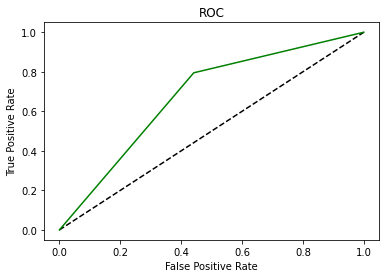

In [1622]:
lda_te_acc=accuracy_score(test_labels,pred_final_te).round(4)
lda_te_auc=roc_auc_score(test_labels,pred_final_te).round(4)

print()
print('TESTING')
print()
print('Accuracy score ',lda_te_acc,'\n')
print()
print('classification_report','\n','\n',classification_report(test_labels,pred_final_te))
print()
print('confusion_matrix','\n','\n',confusion_matrix(test_labels,pred_final_te))
print()
print('ROC-AUC SCORE', lda_te_auc,'\n')

lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(test_labels,pred_final_te)
plt.plot([0, 1], [0, 1], color='black',linestyle='--')
plt.plot(lda_test_fpr, lda_test_tpr,color='green');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')


### MODEL COMPARISON

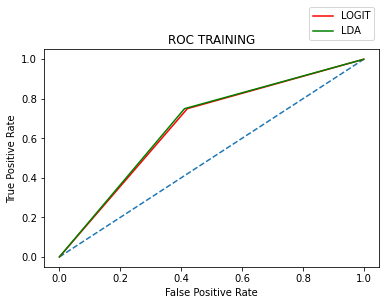

In [1623]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_train_fpr, lg_train_tpr,color='red',label="LOGIT")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC TRAINING')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

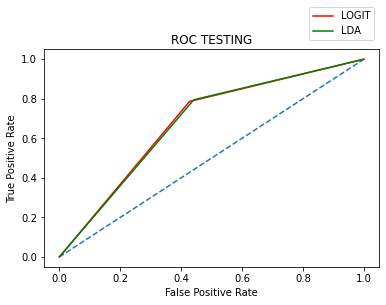

In [1624]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_test_fpr, lg_test_tpr,color='red',label="LOGIT")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC TESTING')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### COMPARISON BETWEEN LOGIT & LDA

In [1625]:
print()
print('COMPARISON TABLE FOR ALL METRICS:')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
        {'LOGIT Train':[lg_tr_acc,lg_tr_auc,lg_tr_recall,lg_tr_precision,lg_tr_f1],
        'LOGIT Test':[lg_te_acc,lg_te_auc,lg_te_recall,lg_te_precision,lg_te_f1],
       'LDA Train':[lda_tr_acc,lda_tr_auc,lda_tr_recall,lda_tr_precision,lda_tr_f1],
        'LDA Test':[lda_te_acc,lda_te_auc,lda_te_recall,lda_te_precision,lda_te_f1],},index=index)
round(data,2)


COMPARISON TABLE FOR ALL METRICS:


,LOGIT Train,LOGIT Test,LDA Train,LDA Test
Accuracy,0.66,0.67,0.66,0.66
AUC,0.66,0.68,0.67,0.68
Recall,0.75,0.79,0.75,0.79
Precision,0.61,0.60,0.61,0.59
F1 Score,0.67,0.68,0.68,0.68
